In [23]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
iris=load_iris()
x=iris.data
y=iris.target

In [42]:
train_x,test_x,train_y,test_y=train_test_split(x,y,stratify=y,random_state=4)
#shuffle=False means no random selection ,it it False then stratify must set as dafault
#if we set stratify(estor kora) =y then the output is changed ,no expalnation here!
#train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.4,random_state=4)

In [40]:
def linechart(x,y,ch=1):
    plt.figure(figsize=(10,7))
    plt.xlabel('the number of neighbors')
    plt.ylabel(' accuracy of neighbors')
    plt.plot(x,y,label='test_accuracy')
    if ch==2:plt.plot(x,train_accuracy,label='train_accuracy')
    plt.legend()

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]
None


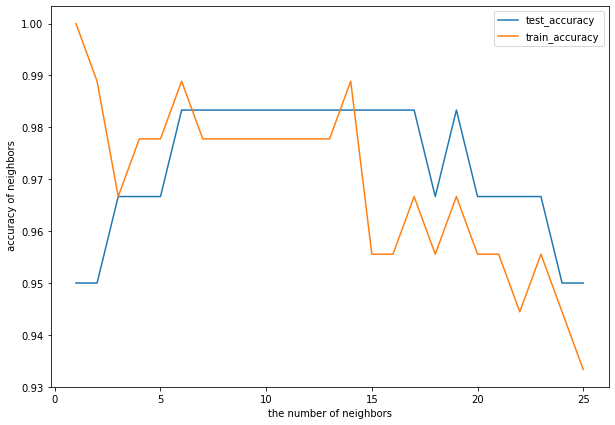

In [37]:
train_accuracy=[]
test_accuracy=[]
neighbors=list(range(1,26))
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x,train_y)
    test_accuracy.append(accuracy_score(test_y,knn.predict(test_x)))
    train_accuracy.append(accuracy_score(train_y,knn.predict(train_x)))
print(test_accuracy)
print(linechart(neighbors,test_accuracy,2))

[0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]
None


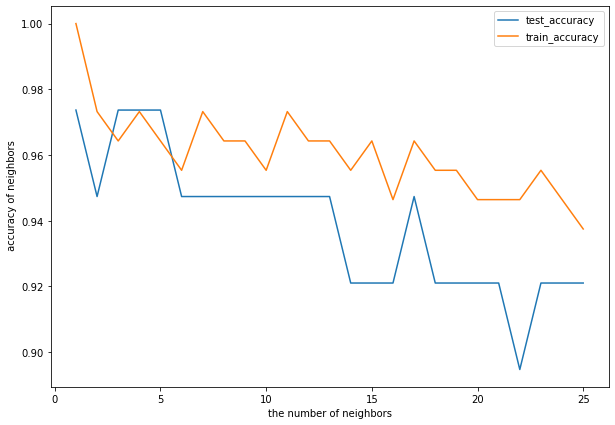

In [45]:
#check book things
test_accu=[]
train_accuracy=[]
neighbors=list(range(1,26))
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x,train_y)
    test_accu.append(knn.score(test_x,test_y))
    train_accuracy.append(knn.score(train_x,train_y))
print(test_accu)
print(linechart(neighbors,test_accu,2))

[0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]
None


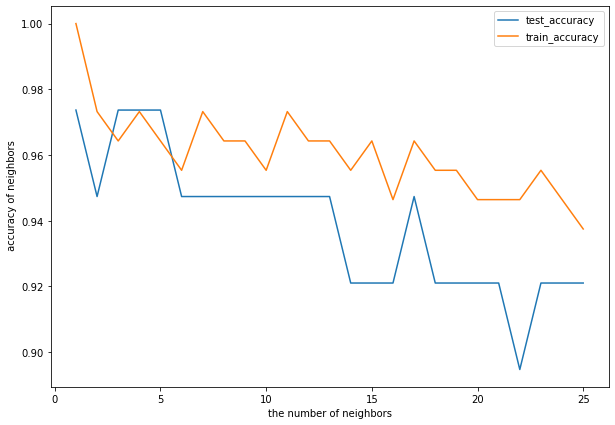

In [46]:
#check book thing in my way #res-- same result using knn.score, and accuracy_score
test_accu=[]
train_accuracy=[]
neighbors=list(range(1,26))
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x,train_y)
    test_accu.append(accuracy_score(test_y,knn.predict(test_x)))
    train_accuracy.append(accuracy_score(train_y,knn.predict(train_x)))
print(test_accu)
print(linechart(neighbors,test_accu,2))

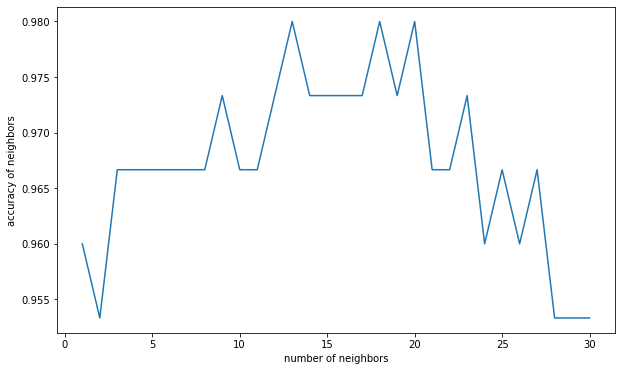

In [51]:
#croos validation so no need for train_test_split
score=[]
new_neighbors=list(range(1,31))
for n in new_neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    score.append(cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean())
plt.figure(figsize=(10,6))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy of neighbors')
plt.plot(new_neighbors,score)

In [56]:
#best model on cross validation
knn=KNeighborsClassifier(n_neighbors=20)
logReg=LogisticRegression()
score1=cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()
print(score1)
score2=cross_val_score(logReg,x,y,cv=10,scoring='accuracy').mean()
print(score2)

0.9800000000000001


c:\users\rockey-raem\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\rockey-raem\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

0.9733333333333334


c:\users\rockey-raem\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
